In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('5000 Sales Records.csv')

# Заменили названия столбцов и поменяли тип данных

In [3]:
df.columns = map(str.lower, df.columns)

In [4]:
df['order date'] = pd.to_datetime(df['order date'])

In [5]:
df['ship date'] = pd.to_datetime(df['ship date'])

# Находим макс. и мин. значения столбцов 'total revenue', 'total cost', 'total profit', 'units sold'

In [6]:
region_sales = df.pivot_table(index=['region'], values=('total revenue', 'total cost', 'total profit', 'units sold'), aggfunc='sum').sort_values('region', ascending=True)
region_sales = region_sales.reset_index()

In [7]:
region_sales

,region,total cost,total profit,total revenue,units sold
0,Asia,6.420394e+08,2.782377e+08,9.202771e+08,3620036
1,Australia and Oceania,4.124295e+08,1.749346e+08,5.873641e+08,2111786
2,Central America and the Caribbean,4.803643e+08,2.046120e+08,6.849763e+08,2698776
3,Europe,1.201946e+09,5.016760e+08,1.703622e+09,6582322
4,Middle East and North Africa,5.354875e+08,2.313803e+08,7.668678e+08,3013431
5,North America,1.097739e+08,4.124040e+07,1.510143e+08,484760
6,Sub-Saharan Africa,1.283425e+09,5.311423e+08,1.814567e+09,6642380


# Находим и мин. значения столбцов 'unit price', 'unit cost'

In [8]:
region_min_units = df.pivot_table(index=['region'], values=('unit price', 'unit cost'), aggfunc='min').sort_values('region', ascending=True)
region_min_units = region_min_units.reset_index()

In [9]:
region_min_units

,region,unit cost,unit price
0,Asia,6.92,9.33
1,Australia and Oceania,6.92,9.33
2,Central America and the Caribbean,6.92,9.33
3,Europe,6.92,9.33
4,Middle East and North Africa,6.92,9.33
5,North America,6.92,9.33
6,Sub-Saharan Africa,6.92,9.33


# Находим и макс. значения столбцов 'unit price', 'unit cost'

In [10]:
region_max_units = df.pivot_table(index=['region'], values=('unit price', 'unit cost'), aggfunc='max').sort_values('region', ascending=True)
region_max_units = region_max_units.reset_index()

In [11]:
region_max_units

,region,unit cost,unit price
0,Asia,524.96,668.27
1,Australia and Oceania,524.96,668.27
2,Central America and the Caribbean,524.96,668.27
3,Europe,524.96,668.27
4,Middle East and North Africa,524.96,668.27
5,North America,524.96,668.27
6,Sub-Saharan Africa,524.96,668.27


# Построение графика зависимости продаж от их типа(онлайн-оффлайн)

In [12]:
df1 = pd.DataFrame(region_sales['region'])

In [13]:
df1.insert(1, 'online sales', 0)

In [14]:
df1.insert(2, 'offline sales', 0)

In [15]:
for i in range(len(df)):
    if df['sales channel'].loc[i] == 'Online':
        if df['region'].loc[i] == 'Asia':
            df1['online sales'].loc[0] += 1
        if df['region'].loc[i] == 'Australia and Oceania':
            df1['online sales'].loc[1] += 1
        if df['region'].loc[i] == 'Central America and the Caribbean':
            df1['online sales'].loc[2] += 1
        if df['region'].loc[i] == 'Europe':
            df1['online sales'].loc[3] += 1
        if df['region'].loc[i] == 'Middle East and North Africa':
            df1['online sales'].loc[4] += 1
        if df['region'].loc[i] == 'North America':
            df1['online sales'].loc[5] += 1
        if df['region'].loc[i] == 'Sub-Saharan Africa':
            df1['online sales'].loc[6] += 1
    if df['sales channel'].loc[i] == 'Offline':
        if df['region'].loc[i] == 'Asia':
            df1['offline sales'].loc[0] += 1
        if df['region'].loc[i] == 'Australia and Oceania':
            df1['offline sales'].loc[1] += 1
        if df['region'].loc[i] == 'Central America and the Caribbean':
            df1['offline sales'].loc[2] += 1
        if df['region'].loc[i] == 'Europe':
            df1['offline sales'].loc[3] += 1
        if df['region'].loc[i] == 'Middle East and North Africa':
            df1['offline sales'].loc[4] += 1
        if df['region'].loc[i] == 'North America':
            df1['offline sales'].loc[5] += 1
        if df['region'].loc[i] == 'Sub-Saharan Africa':
            df1['offline sales'].loc[6] += 1

C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['online sales'].loc[2] += 1
C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['offline sales'].loc[2] += 1
C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['offl

C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['online sales'].loc[6] += 1
C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['offline sales'].loc[4] += 1
C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['off

C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['online sales'].loc[3] += 1
C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['online sales'].loc[2] += 1
C:\Users\Администратор\AppData\Local\Temp\ipykernel_11316\3611340491.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['offli

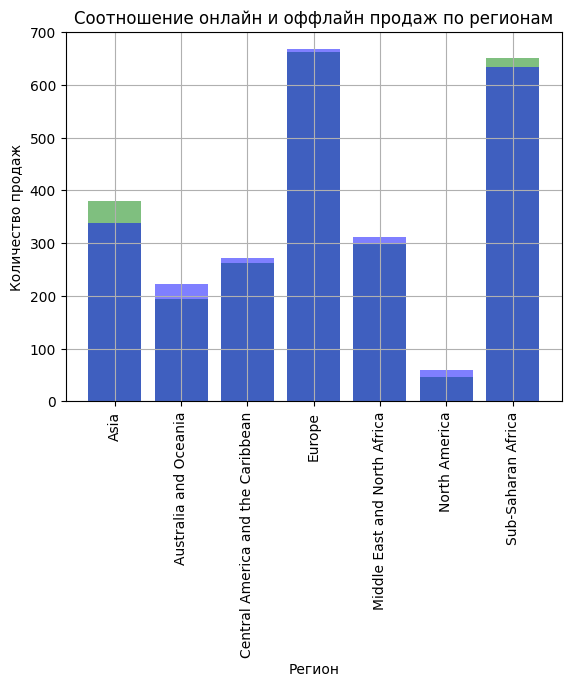

In [16]:
plt.grid()
plt.bar(df1['region'], df1['online sales'], alpha = 0.5, color = 'g')
plt.bar(df1['region'], df1['offline sales'], alpha = 0.5, color = 'b')
plt.xticks(rotation=90)
plt.xlabel('Регион')
plt.ylabel('Количество продаж')
plt.title('Соотношение онлайн и оффлайн продаж по регионам')
plt.show()

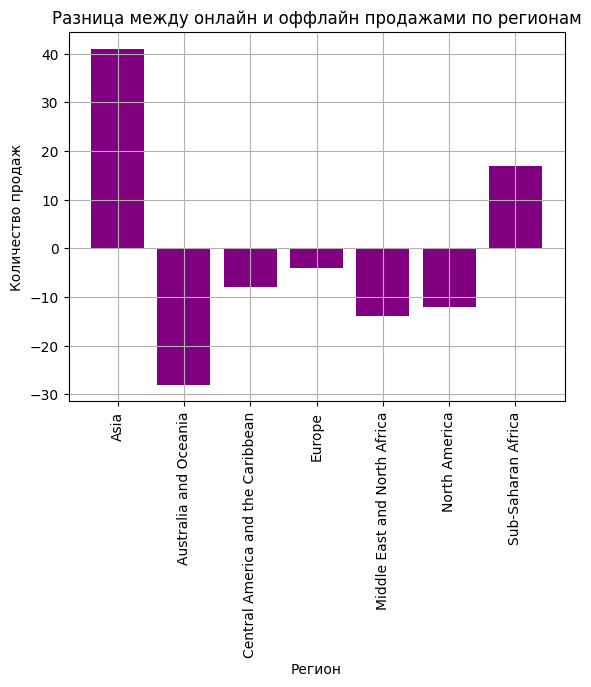

In [17]:
plt.grid()
plt.bar(df1['region'], df1['online sales']-df1['offline sales'], color = 'purple')
plt.xticks(rotation=90)
plt.xlabel('Регион')
plt.ylabel('Количество продаж')
plt.title('Разница между онлайн и оффлайн продажами по регионам')
plt.show()